In [39]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

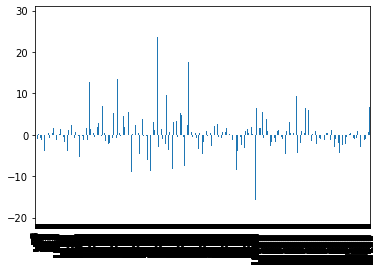

In [4]:
df['accr3'].plot(kind = 'bar')

In [ ]:
# 标准化作弊法？如何标准化？

In [71]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def normalize_column(df,column_name):
    
    # copy the data
    df_sklearn = df.copy()
    
    # apply normalization techniques
    column = column_name
    df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))
    
    return df_sklearn

In [72]:
def calculate_rate(df,pweight=1,nweight=1):
    
    df['score'] = 0.0
    
    for i in range(len(df)):
        
#         df.score[i] = (pweight*df.positive[i]/df.length[i]) - (nweight*df.negative[i]/df.length[i])

        if((df.positive[i] + df.negative[i])!=0):
            df.score[i] = (pweight*df.positive[i] - nweight*df.negative[i])/(df.positive[i] + df.negative[i])
    
    df = normalize_column(df,"score")
    
    return df

In [73]:
def predict_result(df,theta=0.5):
    
    df['pred'] = 0
    count = 0
    
    for i in range(len(df)):
        
        df.accr3_label[i] = int(df.accr3_label[i])
        df.accr5_label[i] = int(df.accr5_label[i])
        
        if(df.score[i]>theta):
            df.pred[i] = 1
            count = count+1
    
    
    return df

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def check(df,pweight=1,nweight=1,accr="accr3",theta = 0.5):
    
    df0 = calculate_rate(df,pweight=pweight,nweight=nweight)
    df1 = predict_result(df0,theta=theta)
    
    if(accr=="accr3"):
        real = list(df1['accr3_label'])
        
    if(accr=="accr5"):
        real = list(df1['accr5_label'])
    
    pred = list(df1['pred'])
    positive_rate = (pred.count(1))/len(pred)
    
    print('预测累积超额收益率为正占比: ',positive_rate)
    
    print('分类准确率: ',accuracy_score(real,pred))
    print('宏平均准确率: ',precision_score(real,pred,average='macro'))
    print('微平均准确率: ',precision_score(real,pred,average='micro'))
    
    print('宏平均召回率: ',recall_score(real,pred,average='macro'))
    print('微平均召回率: ',recall_score(real,pred,average='micro'))
    
    print('宏平均f1值为: ',f1_score(real,pred,average='macro'))
    print('微平均f1值为: ',f1_score(real,pred,average='micro'))
    
    return df1

In [75]:
df = pd.read_csv("data/sentiment_dictionary_result/2016_1.csv")
df

,code,date,accr3,accr3_label,accr5,accr5_label,positive,negative,length
0,000001.SZ,20160608,0.7966,1,0.0783,1,33,14,437
1,000001.SZ,20160520,0.2525,1,-0.5925,0,54,32,718
2,000001.SZ,20160520,0.2525,1,-0.5925,0,81,17,906
3,000001.SZ,20160520,0.2525,1,-0.5925,0,86,15,930
4,000001.SZ,20160520,0.2525,1,-0.5925,0,27,10,438
...,...,...,...,...,...,...,...,...,...
15150,603885.SH,20160204,4.5540,1,4.7230,1,10,3,193
15151,603885.SH,20160204,4.5540,1,4.7230,1,134,23,1259
15152,603885.SH,20160126,4.6156,1,8.9343,1,23,4,167
15153,603885.SH,20160114,0.6109,1,5.7107,1,8,3,73


In [48]:
# method 1

check(df,pweight=1,nweight=1,accr="accr3",theta = 0.35)

预测累积超额收益率为正占比:  0.7061695809963708
分类准确率:  0.5028703398218409
宏平均准确率:  0.5168169254469206
微平均准确率:  0.5028703398218409
宏平均召回率:  0.5139981345776469
微平均召回率:  0.5028703398218409
宏平均f1值为:  0.4863611696647421
微平均f1值为:  0.5028703398218409


In [80]:
# method 2

check(df,pweight=1,nweight=1,accr="accr3",theta = 0.75)

预测累积超额收益率为正占比:  0.42256680963378423
分类准确率:  0.5140877598152425
宏平均准确率:  0.5101674379892409
微平均准确率:  0.5140877598152425
宏平均召回率:  0.5099523688505907
微平均召回率:  0.5140877598152425
宏平均f1值为:  0.5087413521970497
微平均f1值为:  0.5140877598152425


,code,date,accr3,accr3_label,accr5,accr5_label,positive,negative,length,score,pred
0,000001.SZ,20160608,0.7966,1,0.0783,1,33,14,437,0.702128,0
1,000001.SZ,20160520,0.2525,1,-0.5925,0,54,32,718,0.627907,0
2,000001.SZ,20160520,0.2525,1,-0.5925,0,81,17,906,0.826531,1
3,000001.SZ,20160520,0.2525,1,-0.5925,0,86,15,930,0.851485,1
4,000001.SZ,20160520,0.2525,1,-0.5925,0,27,10,438,0.729730,0
...,...,...,...,...,...,...,...,...,...,...,...
15150,603885.SH,20160204,4.5540,1,4.7230,1,10,3,193,0.769231,1
15151,603885.SH,20160204,4.5540,1,4.7230,1,134,23,1259,0.853503,1
15152,603885.SH,20160126,4.6156,1,8.9343,1,23,4,167,0.851852,1
15153,603885.SH,20160114,0.6109,1,5.7107,1,8,3,73,0.727273,0


In [55]:
check(df,pweight=1,nweight=0,accr="accr3",theta = 0.4)

预测累积超额收益率为正占比:  0.07040580666446718
分类准确率:  0.5227317716925107
宏平均准确率:  0.4985836783330593
微平均准确率:  0.5227317716925107
宏平均召回率:  0.4996281381844795
微平均召回率:  0.5227317716925107
宏平均f1值为:  0.39710181487970586
微平均f1值为:  0.5227317716925107


In [59]:
check(df,pweight=1,nweight=0,accr="accr3",theta = 0.2)

预测累积超额收益率为正占比:  0.6052787858792478
分类准确率:  0.5024084460574068
宏平均准确率:  0.5084444710999891
微平均准确率:  0.5024084460574068
宏平均召回率:  0.5080934964355237
微平均召回率:  0.5024084460574068
宏平均f1值为:  0.49933184654043383
微平均f1值为:  0.5024084460574068


In [67]:
check(df,pweight=1,nweight=3,accr="accr3",theta = 0.5)

预测累积超额收益率为正占比:  0.7111184427581656
分类准确率:  0.5030682942923128
宏平均准确率:  0.5175507642729155
微平均准确率:  0.5030682942923128
宏平均召回率:  0.5144635731745978
微平均召回率:  0.5030682942923128
宏平均f1值为:  0.4856095982976938
微平均f1值为:  0.5030682942923128


,code,date,accr3,accr3_label,accr5,accr5_label,positive,negative,length,score,pred
0,000001.SZ,20160608,0.7966,1,0.0783,1,33,14,437,0.529015,1
1,000001.SZ,20160520,0.2525,1,-0.5925,0,54,32,718,0.487192,0
2,000001.SZ,20160520,0.2525,1,-0.5925,0,81,17,906,0.588280,1
3,000001.SZ,20160520,0.2525,1,-0.5925,0,86,15,930,0.600389,1
4,000001.SZ,20160520,0.2525,1,-0.5925,0,27,10,438,0.544183,1
...,...,...,...,...,...,...,...,...,...,...,...
15150,603885.SH,20160204,4.5540,1,4.7230,1,10,3,193,0.557459,1
15151,603885.SH,20160204,4.5540,1,4.7230,1,134,23,1259,0.608712,1
15152,603885.SH,20160126,4.6156,1,8.9343,1,23,4,167,0.624425,1
15153,603885.SH,20160114,0.6109,1,5.7107,1,8,3,73,0.536625,1


In [70]:
check(df,pweight=0,nweight=1,accr="accr3",theta = 0.7)

预测累积超额收益率为正占比:  0.8457274826789838
分类准确率:  0.4864401187726823
宏平均准确率:  0.5096428816705358
微平均准确率:  0.4864401187726823
宏平均召回率:  0.5050471202542424
微平均召回率:  0.4864401187726823
宏平均f1值为:  0.4283246960471027
微平均f1值为:  0.4864401187726823


,code,date,accr3,accr3_label,accr5,accr5_label,positive,negative,length,score,pred
0,000001.SZ,20160608,0.7966,1,0.0783,1,33,14,437,0.829273,1
1,000001.SZ,20160520,0.2525,1,-0.5925,0,54,32,718,0.762491,1
2,000001.SZ,20160520,0.2525,1,-0.5925,0,81,17,906,0.900006,1
3,000001.SZ,20160520,0.2525,1,-0.5925,0,86,15,930,0.914047,1
4,000001.SZ,20160520,0.2525,1,-0.5925,0,27,10,438,0.878331,1
...,...,...,...,...,...,...,...,...,...,...,...
15150,603885.SH,20160204,4.5540,1,4.7230,1,10,3,193,0.917164,1
15151,603885.SH,20160204,4.5540,1,4.7230,1,134,23,1259,0.902645,1
15152,603885.SH,20160126,4.6156,1,8.9343,1,23,4,167,0.872357,1
15153,603885.SH,20160114,0.6109,1,5.7107,1,8,3,73,0.780995,1


In [84]:
positive_dict = pd.read_csv("../已有情感词典/positive_combine.csv")
positive_dict

,word
0,有伸缩性
1,否极阳回
2,无所不通
3,易懂
4,雅量豁然
...,...
20340,生机勃勃
20341,进退有节
20342,手拜
20343,人格高尚


In [82]:
negative_dict = pd.read_csv("../已有情感词典/negative_combine.csv")
negative_dict

,word
0,冒牌货
1,槁
2,狼吃幞头
3,险诈
4,负面
...,...
22671,狐不二雄
22672,觉得疼痛
22673,弃义
22674,不堪设想


In [83]:
corpus = pd.read_csv("data/HS300/corpus_all8.csv")
corpus

,word
0,权益
1,检测
2,风险系数
3,机密
4,登记注册
...,...
9135,最快
9136,著作权
9137,步入
9138,投研


In [86]:
sentiment_dict = list(positive_dict['word'])
sentiment_dict.extend(list(negative_dict['word']))
len(sentiment_dict)

43021

In [87]:
corpus = list(corpus['word'])
len(corpus)

9140

In [88]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [93]:
overlap = intersection(sentiment_dict, corpus)

In [94]:
len(overlap)

1505

In [95]:
overlap

['操作失误',
 '进取',
 '忠于职守',
 '修理',
 '降低',
 '错综复杂',
 '负债',
 '赢得',
 '洞察',
 '蓝图',
 '稳定性',
 '罚款',
 '返还',
 '健全',
 '自助',
 '缺乏',
 '调查',
 '吉利',
 '拜访',
 '减值',
 '精确',
 '成长',
 '紧缺',
 '有害',
 '过度',
 '失误',
 '辐射',
 '资深',
 '灵活性',
 '特许权',
 '互利',
 '股息',
 '停牌',
 '怀疑',
 '规则',
 '调剂',
 '终结',
 '转向',
 '革命',
 '创设',
 '十佳',
 '责令',
 '辅导',
 '损坏',
 '查封',
 '合法',
 '错误',
 '不适',
 '占领',
 '漏洞',
 '可行',
 '明确提出',
 '削减',
 '研究成果',
 '分工',
 '新兴',
 '严峻',
 '缩小',
 '绿化',
 '浮动',
 '负面',
 '保护',
 '辉煌',
 '偿付',
 '流出',
 '付息',
 '显现',
 '理解',
 '独立',
 '收获',
 '频繁',
 '起诉',
 '教育',
 '重视',
 '品牌优势',
 '矛盾',
 '疑问',
 '误导',
 '公允',
 '报警',
 '促成',
 '复杂性',
 '解散',
 '特色',
 '利益冲突',
 '包容',
 '特别',
 '拒绝',
 '遵守',
 '扩充',
 '效能',
 '关怀',
 '顺利',
 '大宗',
 '蓬勃发展',
 '鼓励',
 '担当',
 '加剧',
 '严重不足',
 '放弃',
 '免费',
 '退税',
 '索赔',
 '多变',
 '地震',
 '透露',
 '折旧',
 '解放',
 '圆满',
 '舞弊',
 '不懈',
 '动用',
 '给予',
 '快速',
 '建设性',
 '提高',
 '刑事',
 '噪音',
 '火灾',
 '适合',
 '尊敬',
 '最多',
 '准确性',
 '分开',
 '打击',
 '破产',
 '集资',
 '关闭',
 '阐述',
 '清偿',
 '秩序',
 '冠军',
 '锻炼',
 '警告',
 '稳健',
 '上涨',
 '红旗',
 '妨碍',
 '公开',
 '造

In [98]:
positive_overlap = intersection(list(positive_dict['word']), corpus)
print(len(positive_overlap))
positive_overlap[0:10]

956


['商机', '仪式', '进取', '充足', '高质量', '忠于职守', '修理', '养护', '双赢', '守信']

In [100]:
negative_overlap = intersection(list(negative_dict['word']), corpus)
print(len(negative_overlap))
negative_overlap[0:10]

570


['操作失误', '争夺', '低级', '严重损失', '降低', '错综复杂', '负债', '过剩', '简单', '拖欠']